In [1]:
# data from https://www.kaggle.com/datasets/deepakat002/indian-vehicle-number-plate-yolo-annotation/data

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
%load_ext autoreload
%autoreload 1
%aimport YOLO_detector
%aimport main

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


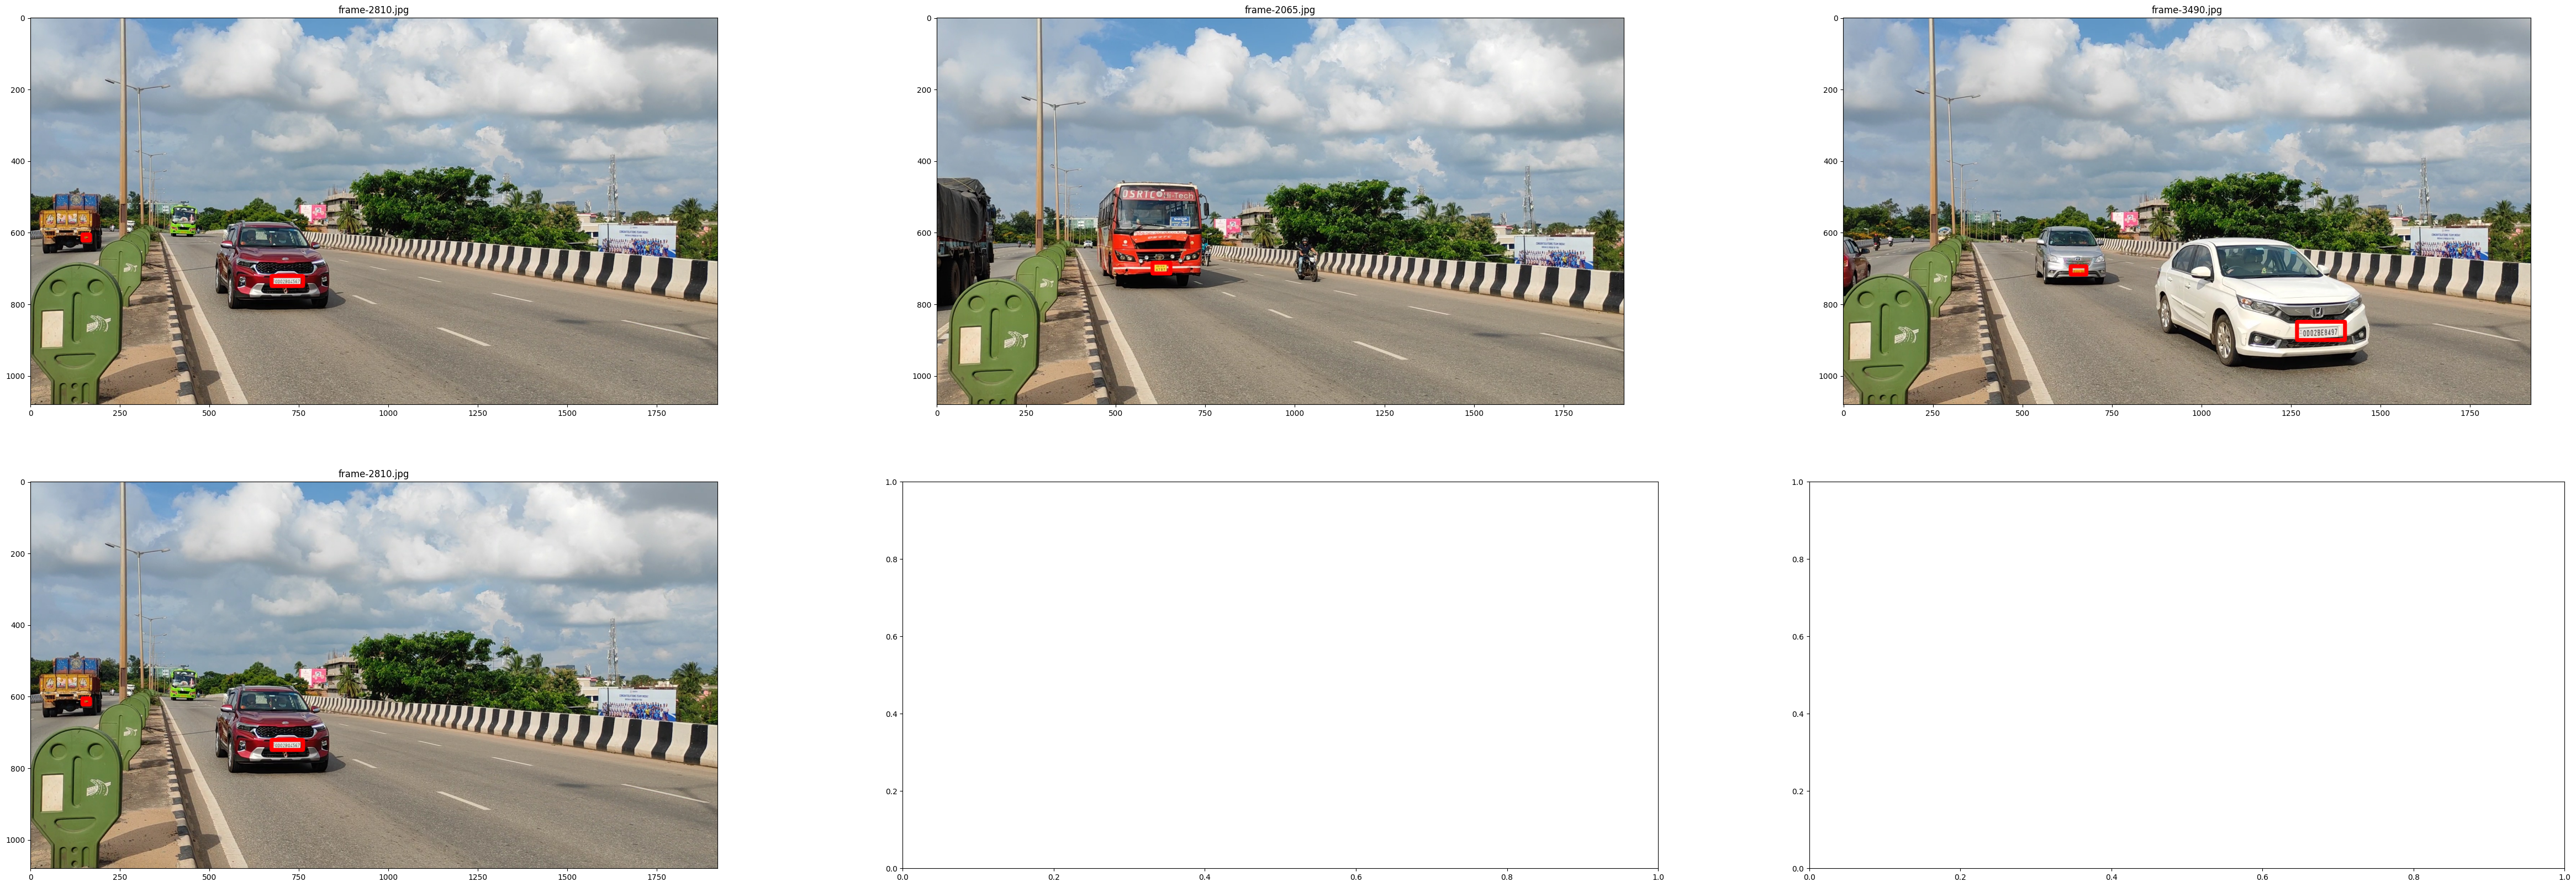

In [3]:
classes = ['plate']
def display_set(set_name, n):
    files = os.listdir('data/plate_detection/'+set_name)
    img_set  = [file for file in files if file.endswith('.jpg')]
    annotations = [file for file in files if file.endswith('.txt')]
    sample = np.random.randint(0, len(img_set), n)
    nrows = (n+2)//3
    figsize = (20 * 3, 10 * nrows)

    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=figsize)
    for i, index in enumerate(sample):
        ax = axes[i//3,i%3]
        img = img_set[index]
        annotation = annotations[index]
        image = cv2.imread('data/plate_detection/'+set_name+'/' + img)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        with open('data/plate_detection/'+set_name+'/' +annotation) as f:
            for line in f:
                class_index, x, y, w, h = line.split()
                image_height, image_width, _ = image.shape
                x, y, w, h = float(x)*image_width, float(y)*image_height, float(w)*image_width, float(h)*image_height
                image = cv2.rectangle(image, (int(x-w/2), int(y-h/2)), (int(x+w/2), int(y+h/2)), (255, 0, 0), 10)
        ax.imshow(image)
        ax.title.set_text(img)
    plt.show()

display_set('vid-1', 4)

In [4]:
from ultralytics import YOLO
coco_model = YOLO('./models/yolov8_for_plate_detection.pt')
classes = [0, 1]

print(coco_model.names)

{0: 'vehicle registration plate', 1: 'vehicle'}


In [5]:
from YOLO_detector import YoloDetector
from main import VideoRunner

car_detector = YoloDetector(coco_model, classes=classes, draw=True)
video_runner = VideoRunner("data/highway/static_front.mp4", car_detector.detect)

In [9]:
video_runner.run()


0: 384x640 2 vehicle registration plates, 15 vehicles, 256.0ms
Speed: 2.1ms preprocess, 256.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 vehicle registration plates, 15 vehicles, 281.9ms
Speed: 2.2ms preprocess, 281.9ms inference, 7.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 vehicle registration plates, 16 vehicles, 245.1ms
Speed: 7.0ms preprocess, 245.1ms inference, 6.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 vehicle registration plates, 17 vehicles, 382.0ms
Speed: 8.0ms preprocess, 382.0ms inference, 6.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 vehicle registration plates, 17 vehicles, 396.2ms
Speed: 6.0ms preprocess, 396.2ms inference, 7.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 vehicle registration plates, 18 vehicles, 213.1ms
Speed: 6.0ms preprocess, 213.1ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 vehicle regist

In [37]:
plate = [0]
plate_extractor = YoloDetector(coco_model, classes=plate, draw=True, margin=0.01).extract
video_runner = VideoRunner("data/highway/static_front.mp4", plate_extractor)

In [38]:
video_runner.run()


0: 384x640 2 vehicle registration plates, 18 vehicles, 280.0ms
Speed: 9.0ms preprocess, 280.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 vehicle registration plates, 19 vehicles, 173.2ms
Speed: 7.7ms preprocess, 173.2ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 vehicle registration plates, 21 vehicles, 165.5ms
Speed: 5.0ms preprocess, 165.5ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 vehicle registration plates, 22 vehicles, 213.2ms
Speed: 7.2ms preprocess, 213.2ms inference, 6.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 vehicle registration plates, 23 vehicles, 225.8ms
Speed: 8.0ms preprocess, 225.8ms inference, 9.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 vehicle registration plates, 23 vehicles, 216.4ms
Speed: 5.0ms preprocess, 216.4ms inference, 11.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 vehicle regis